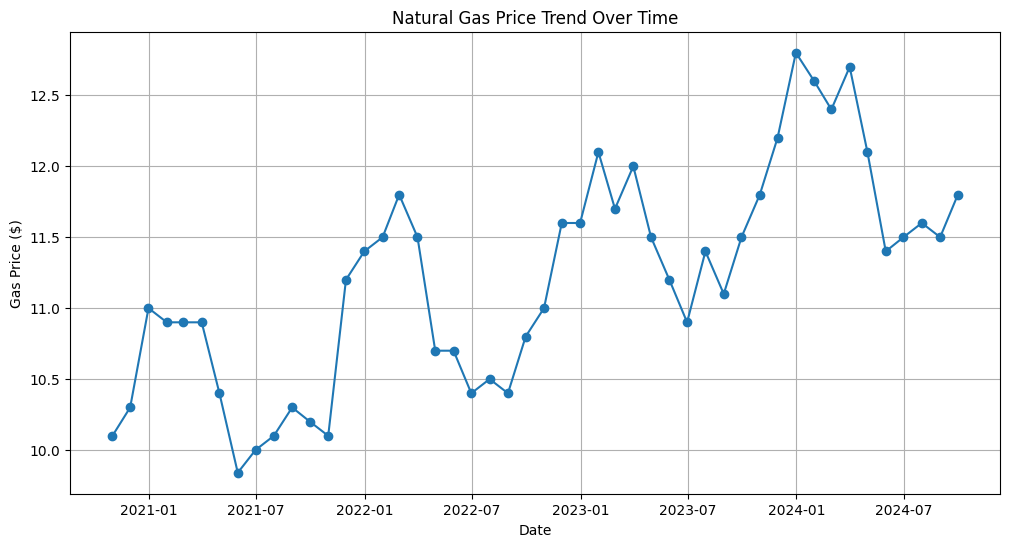

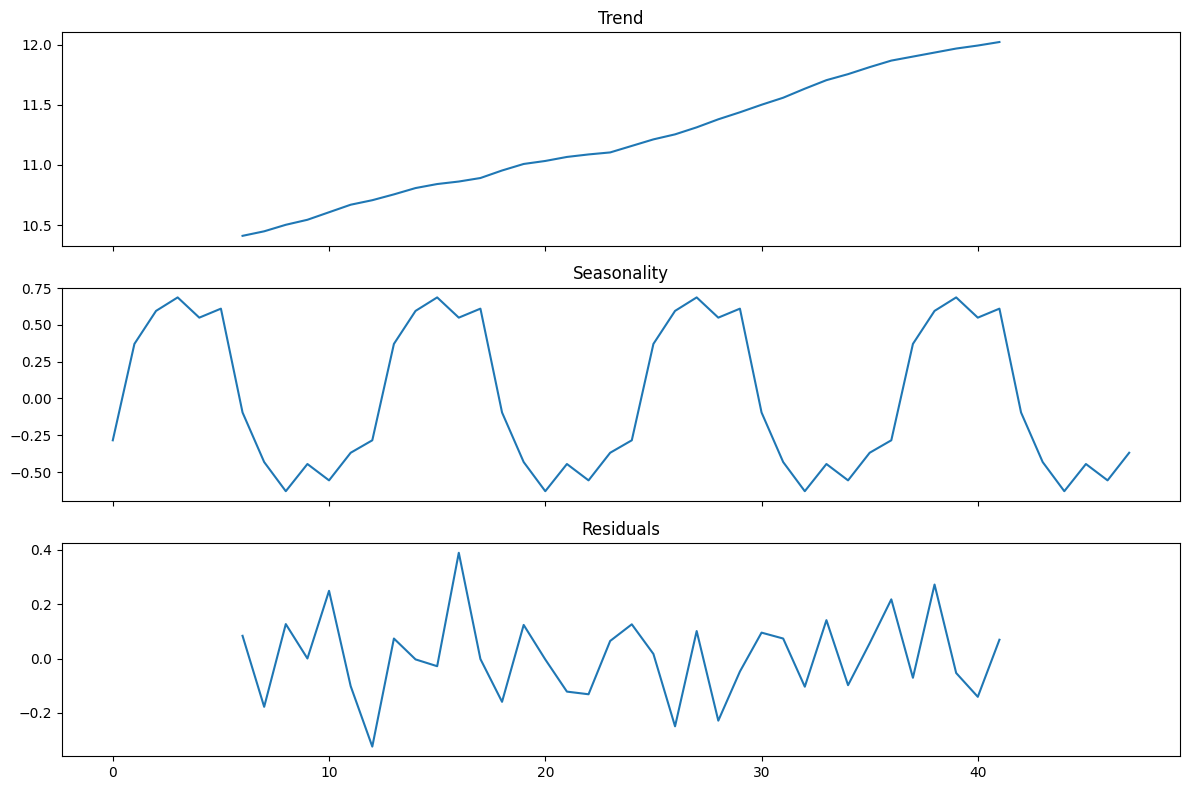

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


        Dates  Estimated Price
32 2023-06-30             10.9
        Dates  Estimated Price
51 2025-01-31        12.551897


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-96f4ab59a515>:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df['Dates'].iloc[-1] + pd.DateOffset(months=1),


In [4]:
!pip install pandas openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
import io
import requests

file_path = "https://www.dropbox.com/scl/fi/6zy6elhmd55oo5wrni5nm/Nat_Gas.xlsx?rlkey=dtvk7iabp7tlk6sjzz6zzzp7r&dl=1"  # Corrected URL


response = requests.get(file_path)
response.raise_for_status()


df = pd.read_excel(io.BytesIO(response.content))

df['Dates'] = pd.to_datetime(df['Dates'])


df = df.sort_values(by='Dates')


plt.figure(figsize=(12, 6))
plt.plot(df['Dates'], df['Prices'], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Gas Price ($)")
plt.title("Natural Gas Price Trend Over Time")
plt.grid(True)
plt.show()


decomposition = seasonal_decompose(df['Prices'], model='additive', period=12)
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
decomposition.trend.plot(ax=axes[0], title="Trend")
decomposition.seasonal.plot(ax=axes[1], title="Seasonality")
decomposition.resid.plot(ax=axes[2], title="Residuals")
plt.tight_layout()
plt.show()

order = (2, 1, 2)
model = ARIMA(df['Prices'], order=order)
model_fit = model.fit()


forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
future_dates = pd.date_range(start=df['Dates'].iloc[-1] + pd.DateOffset(months=1),
                             periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame({'Dates': future_dates, 'Forecasted Prices': forecast.values})


full_df = pd.concat([df[['Dates', 'Prices']].rename(columns={'Prices': 'Estimated Price'}),
                     forecast_df.rename(columns={'Forecasted Prices': 'Estimated Price'})],
                    ignore_index=True)


def get_gas_price(date_str):
    try:
        input_date = pd.to_datetime(date_str)
        closest_date = full_df.iloc[(full_df['Dates'] - input_date).abs().argsort()[:1]]
        return closest_date[['Dates', 'Estimated Price']]
    except Exception as e:
        return f"Error: {e}"


past_date_example = get_gas_price("2023-06-30")
future_date_example = get_gas_price("2025-01-31")


print(past_date_example)
print(future_date_example)